# Empirical Complexity of Vector and Matrix Operations

This notebook implements manual versions of:
- vector–vector (dot) product,
- matrix–vector product, and
- matrix–matrix product,

and times them for increasing sizes `n`. A log–log fit estimates the complexity 
exponents and compares them to the theoretical O(n), O(n²), and O(n³) behavior.

In [11]:
# import packages 

import numpy as np
import matplotlib.pyplot as plt
import time    

Experiment 1: Timing vector–vector products

In [12]:
# common sizes for us to run over during all tasks

n_array = [2**4, 2**5, 2**6, 2**7, 2**8, 2**9]

In [25]:
# write manual dot product function

def manual_dot(u, v):
    """
    input : two 1D numpy arrays of the same length
    output: their dot product (a scalar)
    """

    s = 0.0
    # dot(u, v) = sum_{i=0}^{n-1} u[i] * v[i]
    for i in range(len(u)):
        s += u[i] * v[i]
    return s


In [26]:
# Experiment 1: Timing vector–vector products

time_dot_product = []

for n in n_array:
    x = np.random.randn(n)
    y = np.random.randn(n)

    reps = 10000  # number of dot products to average over

    start_time = time.time()
    for _ in range(reps):
        z = manual_dot(x, y)
    end_time = time.time()

    avg_time = (end_time - start_time) / reps
    time_dot_product.append(avg_time)


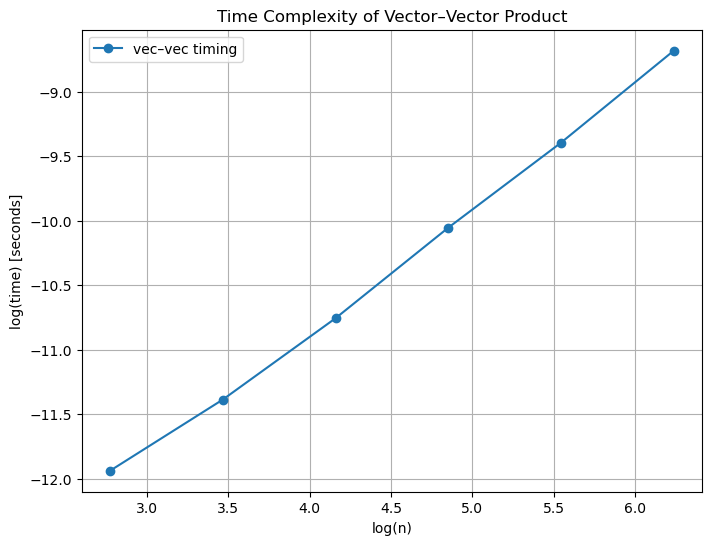

Estimated exponent for vector–vector product time complexity: 0.95


In [27]:
# plot the results on log-log scale 
plt.figure(figsize=(8,6))

# log(t) vs log(n); use markers so it’s easy to see
log_n = np.log(n_array)
log_t = np.log(time_dot_product)

plt.plot(log_n, log_t, 'o-', label='vec–vec timing')

plt.xlabel('log(n)')
plt.ylabel('log(time) [seconds]')
plt.title('Time Complexity of Vector–Vector Product')
plt.legend()
plt.grid(True)
plt.show()

# do a linear fit in log-log space to estimate the exponent
coeffs = np.polyfit(log_n, log_t, 1)
exponent = coeffs[0]
print(f"Estimated exponent for vector–vector product time complexity: {exponent:.2f}")


In [16]:
# do a linear fit in log-log space to estimate the exponent
log_n = np.log(n_array)
log_time = np.log(time_dot_product)
coeffs = np.polyfit(log_n, log_time, 1)
exponent = coeffs[0]
print(f"Estimated exponent for vector-vector product time complexity: {exponent:.2f}")

Estimated exponent for vector-vector product time complexity: 0.29


Experiment 2: Timing Mat-Vec products

In [19]:
# write a manual function for matrix-vector product

def manual_matvec(A, x):
    """
    input : A is an n x n numpy array, x is a vector of length n
    output: y = A x (length-n vector)
    """
    n = A.shape[0]
    y = np.zeros(n)

    # (Ax)_i = sum_{j=0}^{n-1} A[i, j] * x[j]
    for i in range(n):
        s = 0.0
        for j in range(n):
            s += A[i, j] * x[j]
        y[i] = s

    return y


In [20]:
time_matvec = []

for n in n_array:

    # random n x n matrix and length-n vector
    A = np.random.randn(n, n)
    x = np.random.randn(n)

    start_time = time.time()
    y = manual_matvec(A, x)
    end_time = time.time()

    time_matvec.append(end_time - start_time)


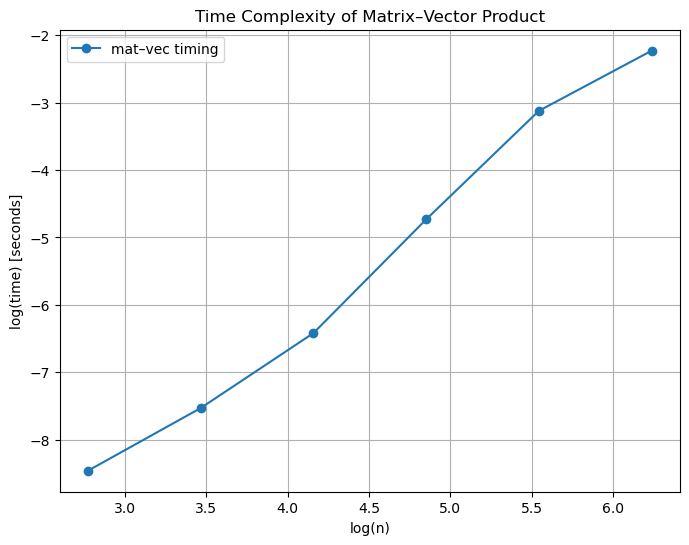

Estimated exponent for matrix–vector product time complexity: 1.90


In [21]:
# repeat timing as in Task 1 for mat-vec products

plt.figure(figsize=(8,6))

log_n = np.log(n_array)
log_t_mv = np.log(time_matvec)

plt.plot(log_n, log_t_mv, 'o-', label='mat–vec timing')

plt.xlabel('log(n)')
plt.ylabel('log(time) [seconds]')
plt.title('Time Complexity of Matrix–Vector Product')
plt.legend()
plt.grid(True)
plt.show()

coeffs_mv = np.polyfit(log_n, log_t_mv, 1)
exp_mv = coeffs_mv[0]
print(f"Estimated exponent for matrix–vector product time complexity: {exp_mv:.2f}")

Experiment 3: Timing Mat-Mat products

In [23]:
time_matmat = []

for n in n_array:

    A = np.random.randn(n, n)
    B = np.random.randn(n, n)

    start_time = time.time()
    C = manual_matmat(A, B)
    end_time = time.time()

    time_matmat.append(end_time - start_time)


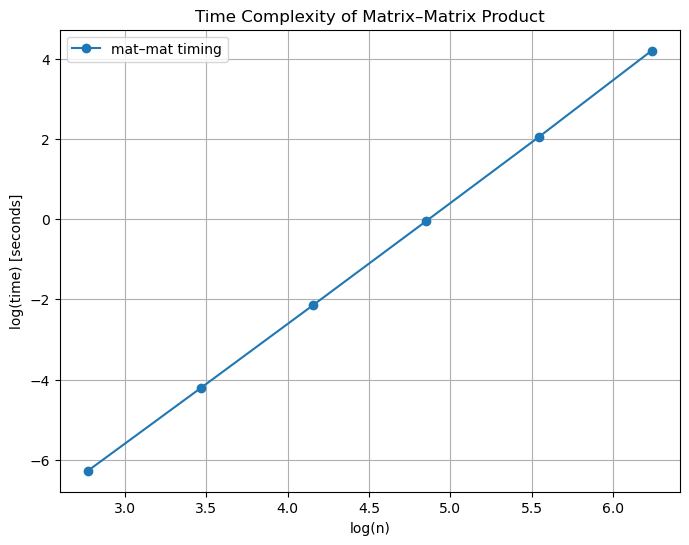

Estimated exponent for matrix–matrix product time complexity: 3.02


In [24]:
plt.figure(figsize=(8,6))

log_n = np.log(n_array)
log_t_mm = np.log(time_matmat)

plt.plot(log_n, log_t_mm, 'o-', label='mat–mat timing')

plt.xlabel('log(n)')
plt.ylabel('log(time) [seconds]')
plt.title('Time Complexity of Matrix–Matrix Product')
plt.legend()
plt.grid(True)
plt.show()

coeffs_mm = np.polyfit(log_n, log_t_mm, 1)
exp_mm = coeffs_mm[0]
print(f"Estimated exponent for matrix–matrix product time complexity: {exp_mm:.2f}")


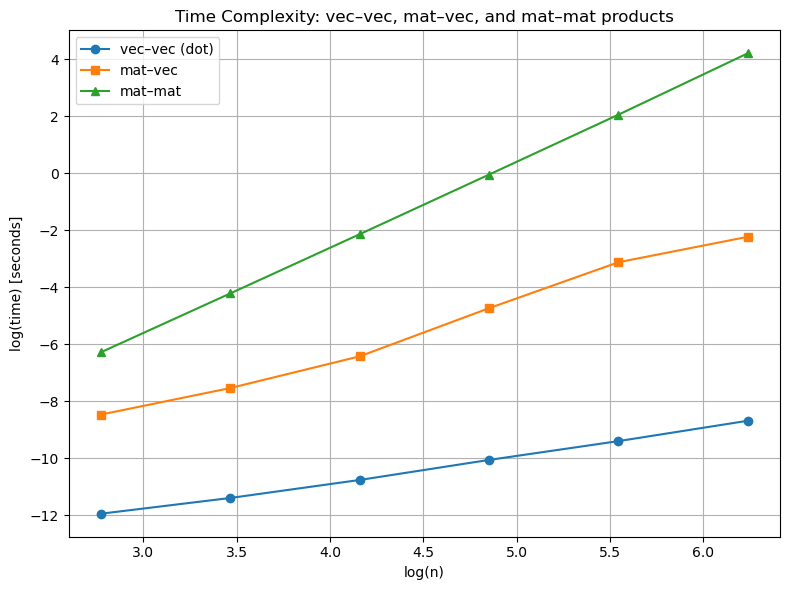

Estimated exponent (vec–vec): 0.95
Estimated exponent (mat–vec): 1.90
Estimated exponent (mat–mat): 3.02


In [28]:
plt.figure(figsize=(8, 6))

log_n = np.log(n_array)

# vec–vec
log_t_vv = np.log(time_dot_product)
plt.plot(log_n, log_t_vv, 'o-', label='vec–vec (dot)', color='C0')

# mat–vec
log_t_mv = np.log(time_matvec)
plt.plot(log_n, log_t_mv, 's-', label='mat–vec', color='C1')

# mat–mat
log_t_mm = np.log(time_matmat)
plt.plot(log_n, log_t_mm, '^-', label='mat–mat', color='C2')

plt.xlabel('log(n)')
plt.ylabel('log(time) [seconds]')
plt.title('Time Complexity: vec–vec, mat–vec, and mat–mat products')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

coeffs_vv = np.polyfit(log_n, log_t_vv, 1)
coeffs_mv = np.polyfit(log_n, log_t_mv, 1)
coeffs_mm = np.polyfit(log_n, log_t_mm, 1)

print(f"Estimated exponent (vec–vec): {coeffs_vv[0]:.2f}")
print(f"Estimated exponent (mat–vec): {coeffs_mv[0]:.2f}")
print(f"Estimated exponent (mat–mat): {coeffs_mm[0]:.2f}")

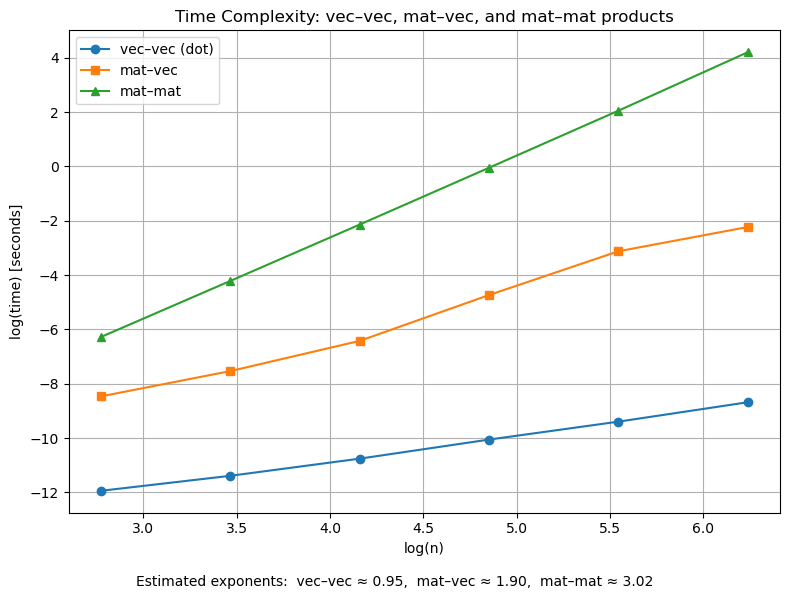

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# assuming n_array, time_dot_product, time_matvec, time_matmat already exist

log_n = np.log(n_array)

log_t_vv = np.log(time_dot_product)
log_t_mv = np.log(time_matvec)
log_t_mm = np.log(time_matmat)

# compute exponents (slopes)
coeffs_vv = np.polyfit(log_n, log_t_vv, 1)
coeffs_mv = np.polyfit(log_n, log_t_mv, 1)
coeffs_mm = np.polyfit(log_n, log_t_mm, 1)

exp_vv = coeffs_vv[0]
exp_mv = coeffs_mv[0]
exp_mm = coeffs_mm[0]

# make one combined figure
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(log_n, log_t_vv, 'o-', label='vec–vec (dot)', color='C0')
ax.plot(log_n, log_t_mv, 's-', label='mat–vec',       color='C1')
ax.plot(log_n, log_t_mm, '^-', label='mat–mat',       color='C2')

ax.set_xlabel('log(n)')
ax.set_ylabel('log(time) [seconds]')
ax.set_title('Time Complexity: vec–vec, mat–vec, and mat–mat products')
ax.legend()
ax.grid(True)

# caption-like text under the axes, but still inside the figure
caption = (
    f"Estimated exponents:  vec–vec ≈ {exp_vv:.2f},  "
    f"mat–vec ≈ {exp_mv:.2f},  mat–mat ≈ {exp_mm:.2f}"
)
# (x, y) are figure coordinates: x in [0,1] left→right, y in [0,1] bottom→top
fig.text(0.5, 0.01, caption, ha='center', va='bottom')

plt.tight_layout(rect=[0, 0.04, 1, 1])  # leave room at bottom for caption
plt.show()

# OPTIONAL: save as an image file to include in your one-page writeup
fig.savefig("complexity_loglog_combined.png", dpi=300, bbox_inches='tight')


### Interpretation

The fitted slopes on the log–log plot are close to 1 (vec–vec), 2 (mat–vec), 
and 3 (mat–mat). This matches the operation counts derived in class: each 
additional dimension multiplies the work by ~n for mat–vec and ~n² for mat–mat. 
Minor deviations from exact integers come from constant factors and Python/NumPy 
overhead.
